In [1]:
!pip install pandas
import pandas as pd

In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
data3 = pd.read_csv("SHOP (1).csv")
data4 = pd.read_csv("SHOP.csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data3=data3.rename(columns={'Date':'ds', 'Close':'y'})
data4=data4.rename(columns={'Date':'ds', 'Close':'y'})

In [5]:
data3.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,21.430000,23.709999,18.610001,23.070000,23.070000,3270900
1,2016-01-25,23.129999,23.680000,22.000000,23.219999,23.219999,1656300
2,2016-02-01,23.260000,23.790001,21.270000,21.870001,21.870001,3223400
3,2016-02-08,21.520000,21.750000,18.580000,19.330000,19.330000,1884400
4,2016-02-15,20.540001,24.809999,19.820000,20.570000,20.570000,6773600


In [6]:
m4 = Prophet(yearly_seasonality = True)

m4.fit(data3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m4.make_future_dataframe(periods = 228)
forecast = m4.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,587.105829,564.783445,607.229060
433,2020-08-25,587.651120,564.649591,610.004949
434,2020-08-26,588.109611,565.216935,610.584379
435,2020-08-27,588.483406,565.674926,610.096895
436,2020-08-28,588.776075,564.996566,610.741022


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

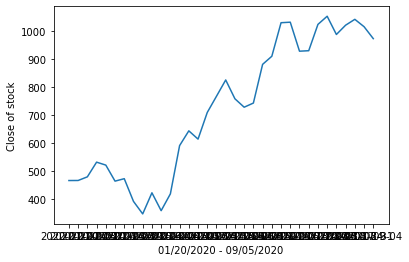

In [8]:
import matplotlib.pyplot as plt

plt.plot(data4.ds,data4.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

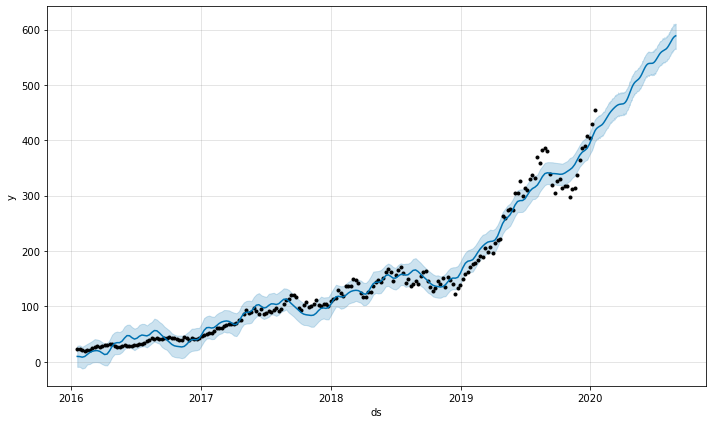

In [9]:
fig1 = m4.plot(forecast)

In [10]:
data4.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,1055.000000,1064.000000,964.739990,987.900024,987.900024,9383400
30,2020-08-17,999.000000,1046.979980,993.169983,1021.119995,1021.119995,6408700
31,2020-08-24,1032.000000,1115.989990,988.880005,1042.060059,1042.060059,9212100
32,2020-08-31,1048.510010,1146.910034,993.859985,1015.700012,1015.700012,8838900
33,2020-09-04,996.190002,1018.979980,896.479980,973.020020,973.020020,3461003


In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,569.416552,564.783445,607.229060,559.653366,578.681702,17.689278,17.689278,17.689278,17.689278,17.689278,17.689278,0.0,0.0,0.0,587.105829
433,2020-08-25,570.095093,564.649591,610.004949,560.277847,579.428825,17.556027,17.556027,17.556027,17.556027,17.556027,17.556027,0.0,0.0,0.0,587.651120
434,2020-08-26,570.773635,565.216935,610.584379,560.877976,580.170687,17.335976,17.335976,17.335976,17.335976,17.335976,17.335976,0.0,0.0,0.0,588.109611
435,2020-08-27,571.452176,565.674926,610.096895,561.488227,580.912356,17.031230,17.031230,17.031230,17.031230,17.031230,17.031230,0.0,0.0,0.0,588.483406
436,2020-08-28,572.130718,564.996566,610.741022,562.151298,581.651488,16.645357,16.645357,16.645357,16.645357,16.645357,16.645357,0.0,0.0,0.0,588.776075


In [13]:
shopify_impact = (973.020020 - 588.776075)/588.776075 * 100
print("Shopify's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by \n", shopify_impact, "% as of 09/05/2020")

Shopify's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by 
 65.26147398227756 % as of 09/05/2020
